In [1]:
view = 0
batch_sz = 4
epochs = 1
steps_per_epoch = 1000
validation_steps = 100

In [ ]:
import os
image_file_list=os.listdir('./data/images')
print(len(image_file_list))
mask_file_list=os.listdir('./data/masks/')
print(len(mask_file_list))
import cv2

img = cv2.imread('./data/images/0001TP_006990.png')

print(img.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(image_file_list,mask_file_list,test_size=0.2,shuffle=False,random_state=1004)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,shuffle=False,random_state=1004)

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('./data/Original_Train')
createFolder('./data/Original_Test')
createFolder('./data/Original_val')
createFolder('./data/Mask_Train')
createFolder('./data/Mask_Test')
createFolder('./data/Mask_val')

In [ ]:
import shutil
src='./data/images/'
dir='./data/Original_Train/'
for i in range(len(X_train)):
    shutil.copy(src+X_train[i],dir+X_train[i])

src='./data/masks/'
dir='./data/Mask_Train/'
for i in range(len(Y_train)):
    shutil.copy(src+Y_train[i],dir+Y_train[i])

src='./data/images/'
dir='./data/Original_Test/'
for i in range(len(X_test)):
    shutil.copy(src+X_test[i],dir+X_test[i])

src='./data/masks/'
dir='./data/Mask_Test/'
for i in range(len(Y_test)):
    shutil.copy(src+Y_test[i],dir+Y_test[i])
    
src='./data/images/'
dir='./data/Original_val/'
for i in range(len(X_val)):
    shutil.copy(src+X_val[i],dir+X_val[i])
    
src='./data/masks/'
dir='./data/Mask_val/'
for i in range(len(Y_val)):
    shutil.copy(src+Y_val[i],dir+Y_val[i])

In [2]:
!git clone https://github.com/GeorgeSeif/Semantic-Segmentation-Suite.git
  

Cloning into 'Semantic-Segmentation-Suite'...
remote: Enumerating objects: 3635, done.
remote: Total 3635 (delta 0), reused 0 (delta 0), pack-reused 3635
Receiving objects: 100% (3635/3635), 874.40 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (461/461), done.
Checking out files: 100% (1451/1451), done.


In [4]:
import os
data_path='./data/'

In [40]:
print('Number of train frames: ' + str(len(os.listdir(data_path+'Original_Train'))))
print('Number of train labels: ' + str(len(os.listdir(data_path+'Mask_Train'))))
print('Number of train frames: ' + str(len(os.listdir(data_path+'Original_val'))))
print('Number of train labels: ' + str(len(os.listdir(data_path+'Mask_val'))))
print('Number of test frames: ' + str(len(os.listdir(data_path+'Original_Test'))))
print('Number of test labels: ' + str(len(os.listdir(data_path+'Mask_Test'))))
print('Total frames: ' + str(len(os.listdir(data_path+'Original_Train')) + len(os.listdir(data_path+'Original_Test')) + len(os.listdir(data_path+'Original_val'))))

Number of train frames: 448
Number of train labels: 448
Number of train frames: 112
Number of train labels: 112
Number of test frames: 141
Number of test labels: 141
Total frames: 701


In [8]:
import pandas as pd
classes = pd.read_csv(data_path+'class_dict.csv', index_col =0)

In [9]:
classes

,r,g,b
name,,,
Animal,64,128,64
Archway,192,0,128
Bicyclist,0,128,192
Bridge,0,128,64
Building,128,0,0
Car,64,0,128
CartLuggagePram,64,0,192
Child,192,128,64
Column_Pole,192,192,128


In [11]:
n_classes = len(classes)
n_classes

32

In [ ]:
Now let s visualize and explore some samples:

In [12]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}

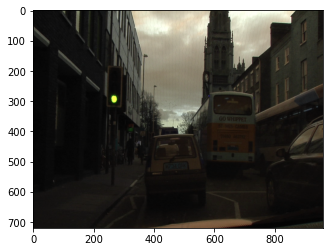

In [13]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import  cv2_imshow

#img = cv2.imread(data_path/'train/0001TP_006690.png')
img = cv2.imread(str(data_path) + '/Original_Train/0001TP_006690.png')
plt.imshow(img)


In [14]:
import numpy as np
mask = cv2.imread(str(data_path) + '/Mask_Train/0001TP_006690_L.png')
mask = cv2.cvtColor((mask).astype(np.uint8), cv2.COLOR_BGR2RGB)# If you want to get the same order as in the color mapping of CAMVID, use the cv converted

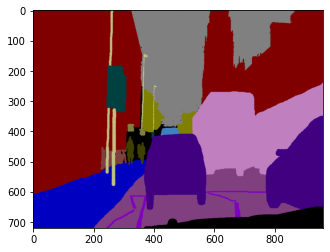

In [15]:
plt.imshow(mask)

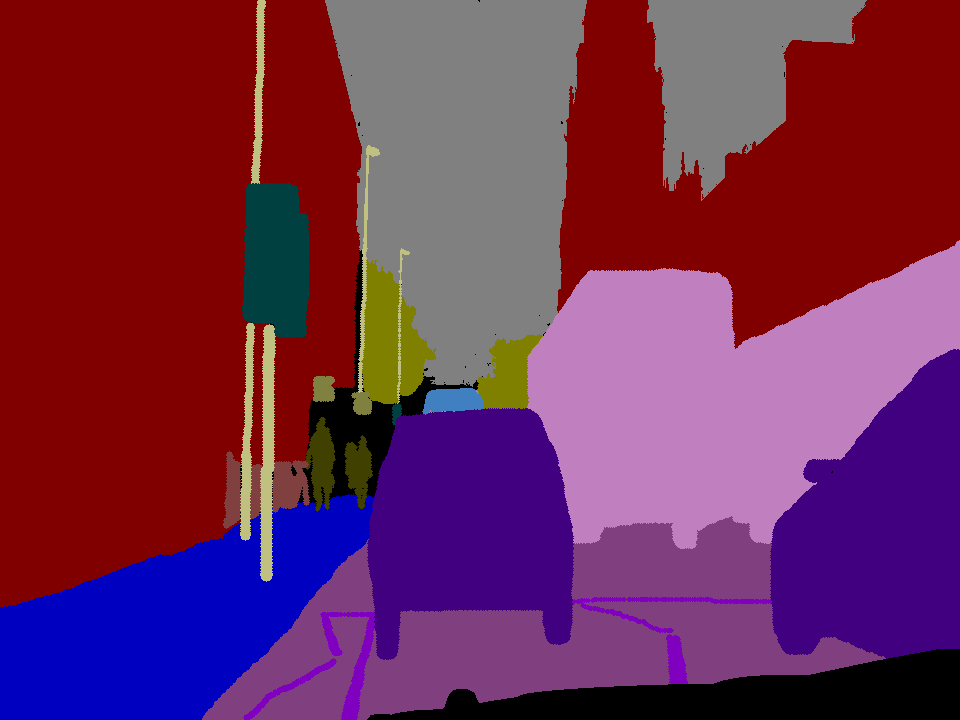

In [17]:
#Another solution is to use load_image from keras which uses RGB (it uses PIL under the hood) unlike cv2.imread
from keras.preprocessing.image import load_img
mask = load_img(str(data_path) + '/Mask_Train/0001TP_006690_L.png')
mask

In [18]:
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.

In [19]:
mask.shape

(720, 960, 3)

In [20]:
def adjust_mask(mask, flat=False):
    
    semantic_map = []
    for colour in list(cls2rgb.values()):        
        equality = np.equal(mask, colour)# 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)# 256x256 If all True, then True, else False
        semantic_map.append(class_map)# List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)# 256x256x32 True only at the found color, and all False otherwise.
    if flat:
        semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

In [21]:
new_mask = adjust_mask(mask)

In [22]:
new_mask.shape

(720, 960, 32)

In [23]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(cls2rgb.items())}


In [24]:
# Map the idx back to rgb
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))

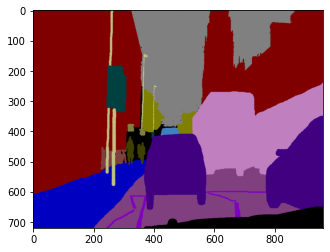

In [25]:
plt.imshow(rgb_mask)

In [80]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(n_classes, pretrained_weights = None,input_size = (256,256,3), flat=False, ohe=True):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(n_classes, (1,1), activation = 'softmax')(conv9)
    conv10 = Conv2D(n_classes, (1,1), padding='same')(conv9)
    if flat:
        output_layer = Reshape((256*256,n_classes))(conv10)
    else:
        output_layer = conv10
    output_layer = Activation('softmax')(output_layer)
     

    model = Model( inputs,output_layer)

    if ohe:
         model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.MeanIoU(num_classes=32)])
    else:
        model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = [tf.keras.metrics.MeanIoU(num_classes=32)])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model



In [81]:
model = unet(n_classes)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_93 (Conv2D)              (None, 256, 256, 64) 1792        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_93[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_94[0][0]                  
____________________________________________________________________________________________

In [82]:
def load_CAMVID(data_type='train', enc='ohe', shape='normal'):
    img_path = str(data_path)+'Original'+'_'+data_type+'/'
    labels_path = str(data_path)+'Mask'+'_'+data_type+'/'
    # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
    x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
    if(enc=='ohe'):
    
        y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
    elif(enc=='sparse_cat'):
        y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
    if(shape == 'flat'):
        y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
        y = np.expand_dims(y, axis=-1)
    return x, y
  

In [83]:
import time
start = time.time()
x_train, y_train = load_CAMVID(data_type='Train')
x_test, y_test = load_CAMVID(data_type='Test')
x_val, y_val = load_CAMVID(data_type='val')
end = time.time()
print('Time elapsed: ', end-start)

Time elapsed:  41.0656213760376


In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(448, 256, 256, 3)
(448, 256, 256, 32)
(112, 256, 256, 3)
(112, 256, 256, 32)
(141, 256, 256, 3)
(141, 256, 256, 32)


In [85]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit(x=x_train, 
              y=y_train,
              validation_data=(x_val, y_val),
              batch_size=batch_sz,# 32 gives OOM sometimes
              epochs=epochs,
              callbacks=[model_checkpoint])

Train on 448 samples, validate on 112 samples
Epoch 1/1
448/448 [==============================] - 342s 764ms/step - loss: 2.0486 - mean_io_u: 0.4844 - val_loss: 1.5677 - val_mean_io_u: 0.4844

Epoch 00001: val_loss improved from inf to 1.56767, saving model to unet_camvid.hdf5


In [138]:
# img (256,256,3)
# gt_mask: gt_mode=sparse--> (256,256) or ohe --> (256,256,32)
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
    plt.figure(1)

      # Img
    plt.subplot(311)
    plt.imshow(img)

      # Predict
    pred_mask = model.predict(np.expand_dims(img, 0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    if shape=='flat':
        pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need

    rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))

    # Prediction
    plt.subplot(312)
    plt.imshow(rgb_mask)

    # GT mask
    if gt_mode == 'ohe':
        gt_img_ohe = np.argmax(gt_mask, axis=-1)
        gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              

    plt.subplot(313)
    plt.imshow(gt_mask)

  
  

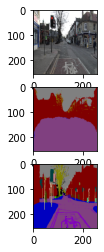

In [87]:
visualize_seg(x_val[100], y_val[100], gt_mode='ohe')

In [88]:
from keras.utils import Sequence
class CAMVID_Dataset(Sequence):


    def __init__(self, data_path, batch_size=4, dim=(256,256), n_classes=32, data_type='train', shape='normal'):

        self.images_dir = str(data_path)+'Original'+'_'+data_type+'/'
        self.masks_dir = str(data_path)+'Mask'+'_'+data_type+'/'
        assert len(os.listdir(self.images_dir)) == len(os.listdir(self.masks_dir))
        self.data_type = data_type
        self.shape = shape
        self.batch_size = batch_size
        self.dim = dim
        self.n = len(os.listdir(self.images_dir))
        self.n_batches = int(np.floor(self.n  / self.batch_size))
        self.indexes = np.arange(self.n)

    def __len__(self):
        return  self.n_batches

    def __getitem__(self, index):
            X = np.empty((self.batch_size, *self.dim, 3))
            Y = np.zeros((self.batch_size, *self.dim, n_classes))
            indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

            # Generate data
            for i, ID in enumerate(indexes):
                idx = ID

            file = sorted(os.listdir(self.images_dir))[idx]

              # Load image
            image = np.array(load_img(str(self.images_dir) + file, target_size=(256,256)))*1./255


              # Load mask
            file = sorted(os.listdir(self.masks_dir))[idx]
            mask = adjust_mask(np.array(load_img(str(self.masks_dir) + file, target_size=(256,256))))

            if(self.shape == 'flat'):
                mask = np.reshape(mask.shape[0], mask.shape[1]*mask.shape[2])
                mask = np.expand_dims(mask, axis=-1)        
            X[i,:] = image
            Y[i,:] = mask
          
            return X, Y
      

In [89]:
train_gen = CAMVID_Dataset(str(data_path), batch_size=batch_sz, n_classes=n_classes, data_type='Train')
valid_gen = CAMVID_Dataset(str(data_path), batch_size=batch_sz, n_classes=n_classes, data_type='val')

In [90]:
x,y = next(enumerate(train_gen))[1]
print(x.shape)
print(y.shape)

(4, 256, 256, 3)
(4, 256, 256, 32)


In [91]:
n_train_samples = len(os.listdir(str(data_path)+'Original_Train/'))
n_train_samples

448

In [92]:
model = unet(n_classes)

In [93]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_gen,
                    validation_data=valid_gen,
                    steps_per_epoch=n_train_samples,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

Epoch 1/1
 86/448 [====>.........................] - ETA: 17:33 - loss: 0.6222 - mean_io_u_1: 0.4961

KeyboardInterrupt: 

In [94]:
# Data generator
#https://keras.io/preprocessing/image/
# Data generator
#batch_sz = 4

from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rescale=1./255)

# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['Original_Train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['Mask_Train'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=batch_sz,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

      

val_image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['Original_val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['Mask_val'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)

      

Found 448 images belonging to 1 classes.
Found 448 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 112 images belonging to 1 classes.


In [96]:
def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)        

In [97]:
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  

In [98]:
def test_generator_fn():
    
    for (img,mask) in test_generator:
        new_mask=adjust_mask(mask)
        yield (img,new_mask)

In [99]:
n_train_samples = len(os.listdir(str(data_path) + '/Original_Train'))
n_train_samples

448

In [100]:
model = unet(n_classes)

In [ ]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=n_train_samples,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

In [ ]:
visualize_seg(next(val_image_generator)[0], next(val_mask_generator)[0], gt_mode='sparse')

In [133]:
# Data generator
#batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    rescale=1./255)

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['Original_Train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['Mask_Train'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

def train_generator_fn():
    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  
        
val_image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['Original_val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['Mask_val'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)        
        
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)         
        
test_image_generator=image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['Original_Test'],
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

test_mask_generator=image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['Mask_Test'],
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

test_generator=zip(test_image_generator,test_mask_generator)

def test_generator_fn():
    
    for (img,mask) in test_generator:
        new_mask=adjust_mask(mask)
        yield (img,new_mask)

Found 448 images belonging to 1 classes.
Found 448 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 141 images belonging to 1 classes.
Found 141 images belonging to 1 classes.


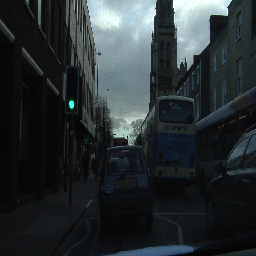

In [102]:
img = load_img(str(data_path) + '/Original_Train/0001TP_006690.png', target_size=(256,256))
img

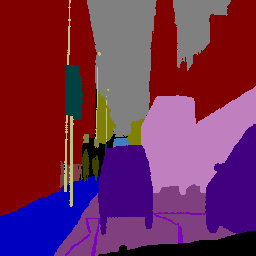

In [103]:
mask = load_img(str(data_path) + '/Mask_Train/0001TP_006690_L.png', target_size=(256,256))
mask

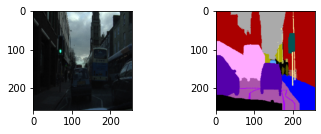

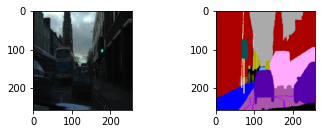

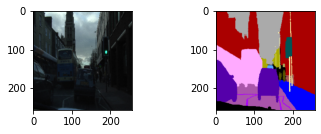

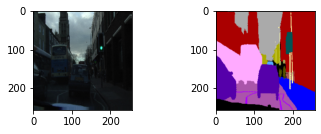

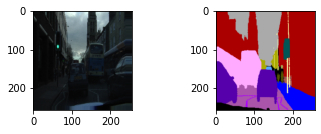

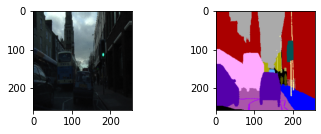

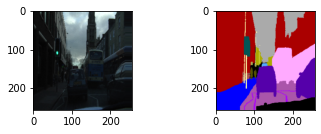

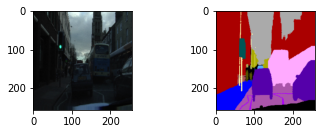

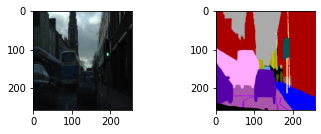

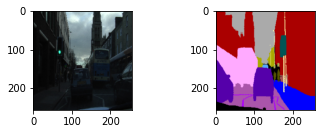

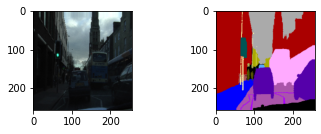

In [104]:
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
from keras.preprocessing.image import array_to_img, img_to_array
i = 0
img = img_to_array(img)
mask = img_to_array(mask)
for aug_img, aug_mask in zip(image_datagen.flow(np.expand_dims(img, 0), batch_size=1), mask_datagen.flow(np.expand_dims(mask, 0), batch_size=1)):
    plt.figure(i)
    plt.subplot(221)
    imgplot = plt.imshow(array_to_img(aug_img[0]))
    plt.subplot(222)
    imgplot = plt.imshow(array_to_img(aug_mask[0]))
    i += 1
    if i > 10:
        break

plt.show()

In [105]:
model = unet(n_classes)

In [106]:
view = 0
batch_sz = 16
epochs = 10
steps_per_epoch = 1000
validation_steps = 100

In [107]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

Epoch 1/10
1000/1000 [==============================] - 2992s 3s/step - loss: 1.2148 - mean_io_u_3: 0.4857 - val_loss: 1.0508 - val_mean_io_u_3: 0.4857

Epoch 00001: val_loss improved from inf to 1.05083, saving model to unet_camvid.hdf5
Epoch 2/10
1000/1000 [==============================] - 2994s 3s/step - loss: 0.9558 - mean_io_u_3: 0.4857 - val_loss: 1.2145 - val_mean_io_u_3: 0.4857

Epoch 00002: val_loss did not improve from 1.05083
Epoch 3/10
1000/1000 [==============================] - 2993s 3s/step - loss: 0.8414 - mean_io_u_3: 0.4857 - val_loss: 1.1021 - val_mean_io_u_3: 0.4857

Epoch 00003: val_loss did not improve from 1.05083
Epoch 4/10
1000/1000 [==============================] - 2994s 3s/step - loss: 0.7399 - mean_io_u_3: 0.4857 - val_loss: 1.3600 - val_mean_io_u_3: 0.4857

Epoch 00004: val_loss did not improve from 1.05083
Epoch 5/10
1000/1000 [==============================] - 2995s 3s/step - loss: 0.6420 - mean_io_u_3: 0.4857 - val_loss: 1.1848 - val_mean_io_u_3: 0.485

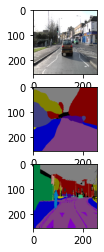

In [108]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')


In [135]:
scores=model.evaluate_generator(test_generator_fn(),steps=5)

In [136]:
scores[1]

0.48588067293167114

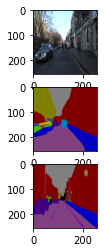

In [139]:
img = next(test_image_generator)[0]
gt_img = next(test_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')